In [76]:
import pandas_datareader as pdr# this library is use to read the data of different sites
import pandas as pd
from datetime import datetime

In [77]:
#accesing world bank data as the world bank api is already support inside pandas_datareader

import pandas_datareader.wb as wb


## 1. Download DataSet from World Bank

Indicators:

'GDP (US$)': 'NY.GDP.MKTP.CD',
    'Life Expectancy': 'SP.DYN.LE00.IN',
    'Literacy Rate': 'SE.ADT.LITR.ZS',
      'Population': 'SP.POP.TOTL

In [78]:
#download dataset from world bank from 1980 to  2024
df = wb.download(indicator = ['NY.GDP.MKTP.CD', 'SP.DYN.LE00.IN', 'SE.ADT.LITR.ZS','SP.POP.TOTL'], country='NP',start = 1980, end = 2024)
df = df.reset_index()
print(df.head())

  country  year  NY.GDP.MKTP.CD  SP.DYN.LE00.IN  SE.ADT.LITR.ZS  SP.POP.TOTL
0   Nepal  1980    1.945917e+09          48.333             NaN     15553105
1   Nepal  1981    2.275583e+09          48.662            21.0     15922423
2   Nepal  1982    2.395424e+09          49.181             NaN     16297987
3   Nepal  1983    2.447175e+09          49.676             NaN     16689119
4   Nepal  1984    2.581207e+09          50.227             NaN     17085242


/tmp/ipython-input-2506415870.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator = ['NY.GDP.MKTP.CD', 'SP.DYN.LE00.IN', 'SE.ADT.LITR.ZS','SP.POP.TOTL'], country='NP',start = 1980, end = 2024)


In [79]:
#renaming column name as gdp, life expentancy and literacyrate
df= df.rename(columns={'NY.GDP.MKTP.CD': 'GDP', 'SP.DYN.LE00.IN':'Life Expectancy','SE.ADT.LITR.ZS':'Literacy Rate','SP.POP.TOTL':'Total Population'})

In [173]:
df

,GDP,Life Expectancy,Total Population,GDP_per_capital
year,,,,
1980-01-01,1.945917,48.333,0.015553,125.114347
1981-01-01,2.275583,48.662,0.015922,142.916899
1982-01-01,2.395424,49.181,0.016298,146.976663
1983-01-01,2.447175,49.676,0.016689,146.632953
1984-01-01,2.581207,50.227,0.017085,151.078187
1985-01-01,2.619914,50.922,0.017478,149.900453
1986-01-01,2.850782,51.594,0.017868,159.545683
1987-01-01,2.957255,52.382,0.018251,162.036907
1988-01-01,3.487010,53.109,0.018639,187.084778


## 2. Data Cleaning :Missing values, duplicates, data types

In [172]:
df.shape
#total 45 rows and 6 columns

(45, 4)

In [82]:
df.isnull().sum()

,0
country,0
year,0
GDP,0
Life Expectancy,1
Literacy Rate,38
Total Population,0


#### Checking % of missing values

In [83]:
df.isnull().sum()/df.shape[0]*100

,0
country,0.000000
year,0.000000
GDP,0.000000
Life Expectancy,2.222222
Literacy Rate,84.444444
Total Population,0.000000


In [84]:
#droping literacy rate since it's is 84% and country column
df = df.drop(columns=['Literacy Rate','country'])

In [85]:
df.head()

,year,GDP,Life Expectancy,Total Population
0,1980,1.945917e+09,48.333,15553105
1,1981,2.275583e+09,48.662,15922423
2,1982,2.395424e+09,49.181,16297987
3,1983,2.447175e+09,49.676,16689119
4,1984,2.581207e+09,50.227,17085242


In [86]:
df.isnull().sum()

,0
year,0
GDP,0
Life Expectancy,1
Total Population,0


__Since there is only 2.2% data missing in Life Expectancy column, so will fill that value__

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Life Expectancy'>

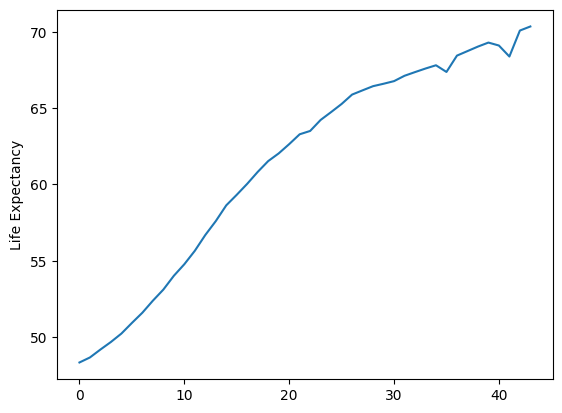

In [88]:
#ploting life expectancy
sns.lineplot(df['Life Expectancy'])

In [89]:
#check null value of life expectancy
df[df['Life Expectancy'].isnull()]

,year,GDP,Life Expectancy,Total Population
44,2024,4.291427e+10,NaN,29651054


__Since the data is linear and increases as year, so we can't fill the value with mean or median; because it break the trend so, we will forward fill__

In [90]:
df['Life Expectancy']=df['Life Expectancy'].fillna(method='ffill')

/tmp/ipython-input-1941173078.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Life Expectancy']=df['Life Expectancy'].fillna(method='ffill')


In [91]:
df.isnull().sum()

,0
year,0
GDP,0
Life Expectancy,0
Total Population,0


__Now, we handle missing values__

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              45 non-null     object 
 1   GDP               45 non-null     float64
 2   Life Expectancy   45 non-null     float64
 3   Total Population  45 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.5+ KB


__Since the year column is object data type we need to change it into datetime format__

In [93]:
df['year'] = pd.to_datetime(df['year'])

__making a year as an index__

In [94]:
df.set_index('year',inplace=True)

In [95]:
df.head()

,GDP,Life Expectancy,Total Population
year,,,
1980-01-01,1.945917e+09,48.333,15553105
1981-01-01,2.275583e+09,48.662,15922423
1982-01-01,2.395424e+09,49.181,16297987
1983-01-01,2.447175e+09,49.676,16689119
1984-01-01,2.581207e+09,50.227,17085242


In [96]:
# for ease we will convert it into the billion for Total population and GPD
df['Total Population'] = df['Total Population']/1000000000
df['GDP'] = df['GDP']/1000000000

### 3. EDA (Exploratory Data Analysis)


<Axes: xlabel='year'>

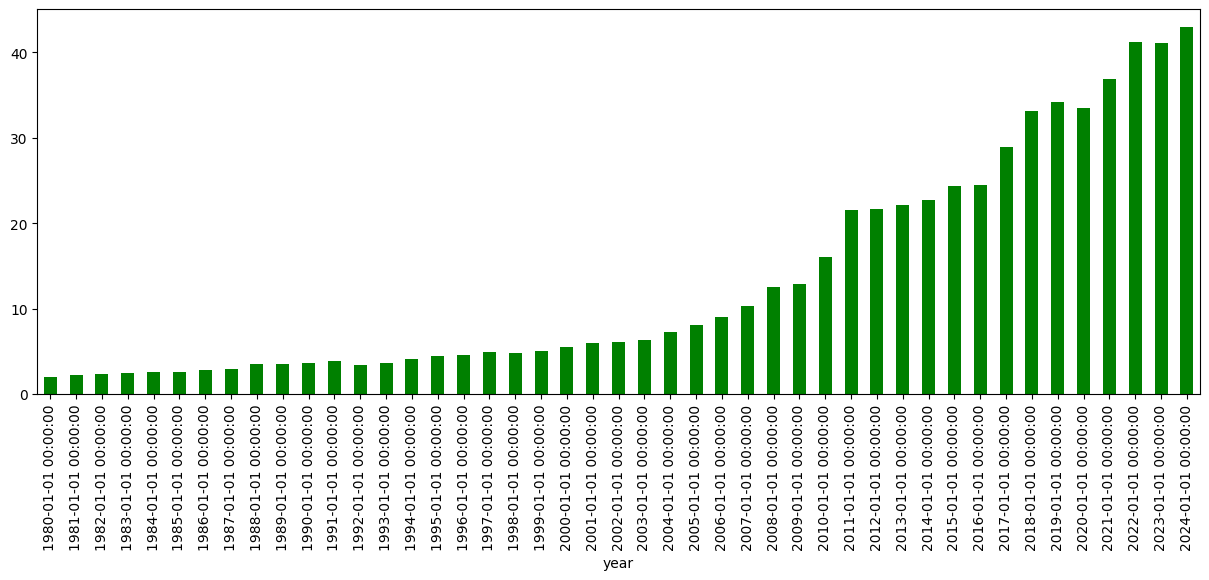

In [97]:
df['GDP'].plot(kind = 'bar',figsize=(15,5),color='green')

In [98]:
df.head()

,GDP,Life Expectancy,Total Population
year,,,
1980-01-01,1.945917,48.333,0.015553
1981-01-01,2.275583,48.662,0.015922
1982-01-01,2.395424,49.181,0.016298
1983-01-01,2.447175,49.676,0.016689
1984-01-01,2.581207,50.227,0.017085


<Axes: xlabel='year'>

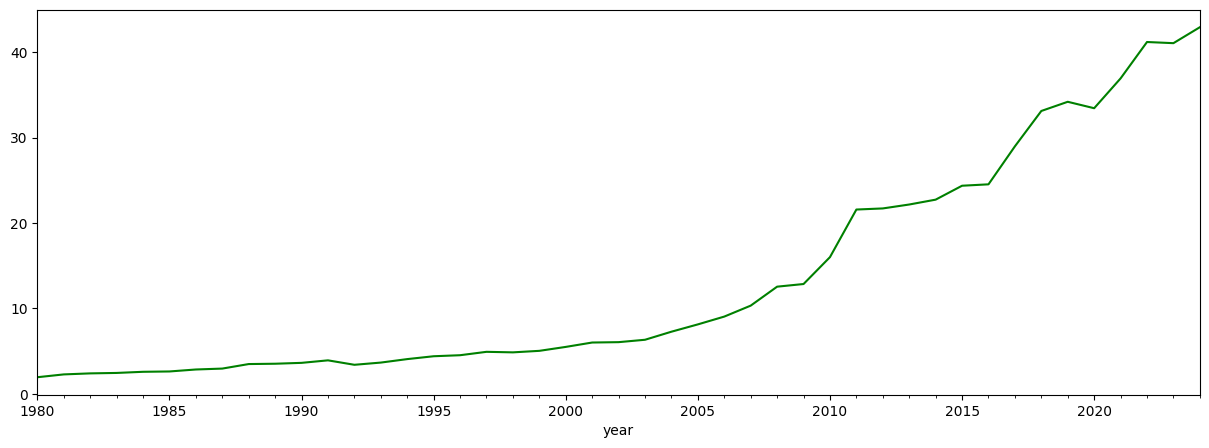

In [99]:
df['GDP'].plot(figsize=(15,5),color='green')

**Key Insight**

The bar plot shows the trend of __Nepal's GDP__ over the years from 1980 to 2024. The major trend here is a significant increase in GDP over this period. it appears that the graph becomes steeper after 2003, indicating a faster rate of GDP growth from that point onwards.

<Axes: xlabel='year'>

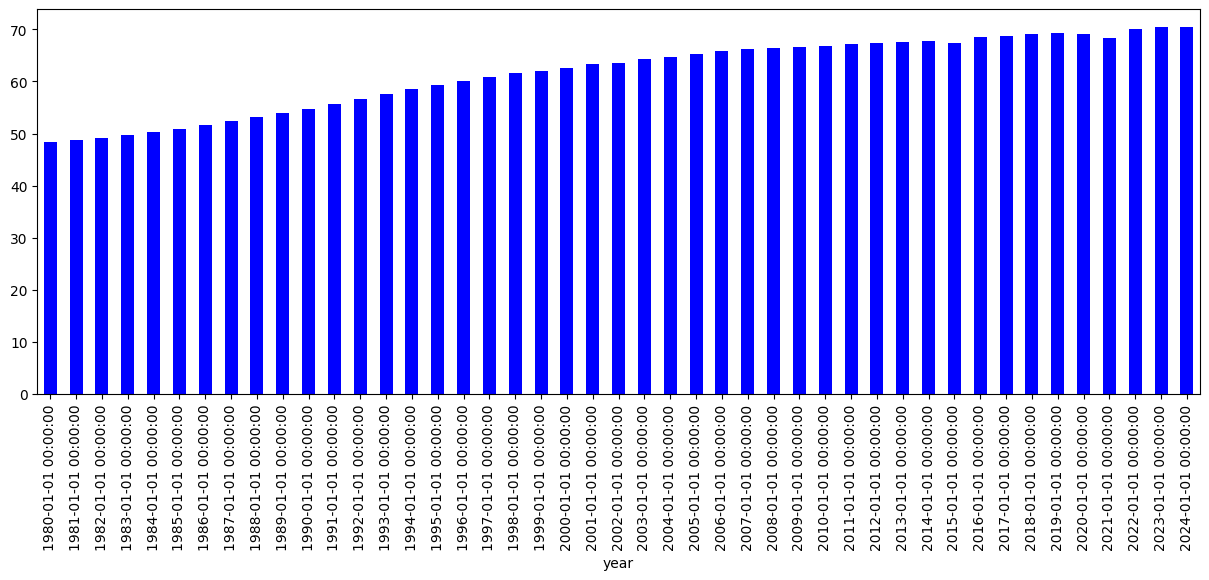

In [100]:
df['Life Expectancy'].plot(kind = 'bar',figsize=(15,5),color='blue')

<Axes: xlabel='year'>

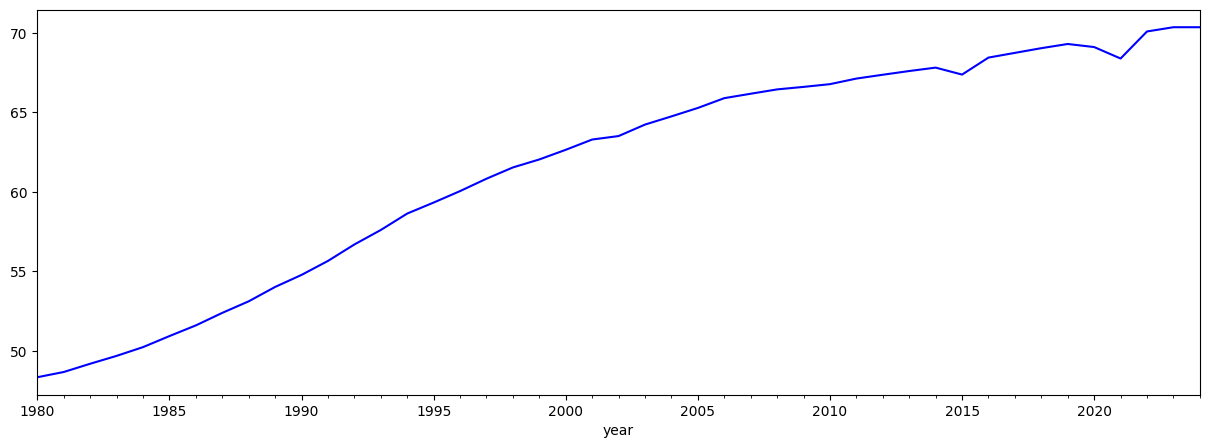

In [101]:
#plotting Life Expectancy
df['Life Expectancy'].plot(figsize=(15,5),color='blue')

**key insight**

The life expectancy graph show a gradual increase over the years, starting from around 48 years and rising to over 70 years. An increasing life expectancy is generally an indicator of positive developments such as improvements in healthcare, sanitation, nutrition, and overall living conditions

In [102]:
##plotting total population

<Axes: xlabel='year'>

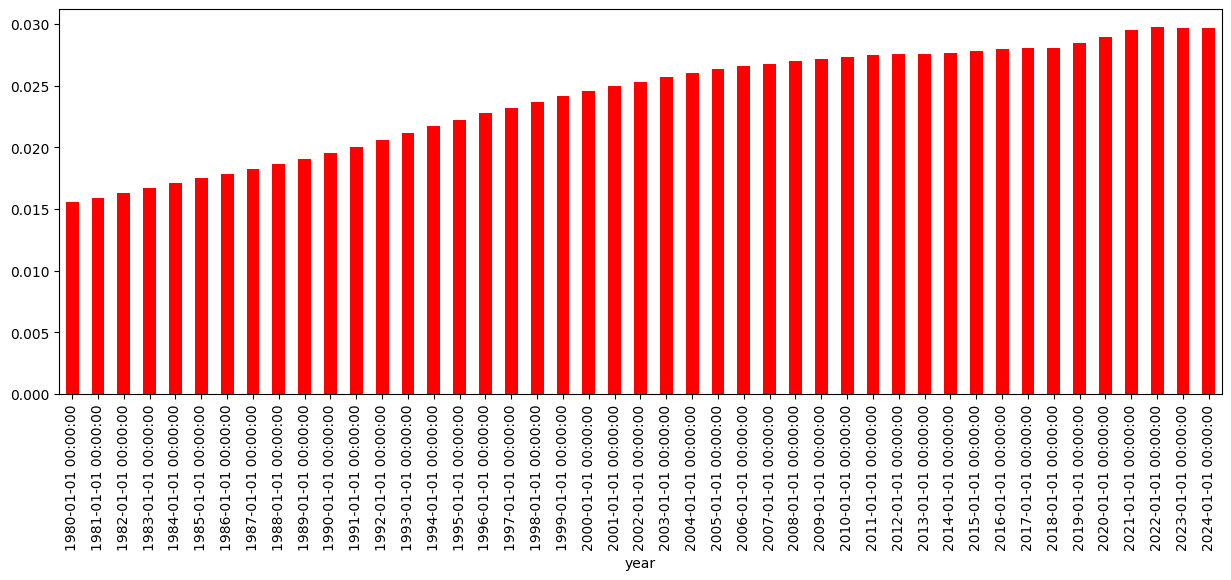

In [103]:
df['Total Population'].plot(kind = 'bar',figsize=(15,5),color='red')

<Axes: xlabel='year'>

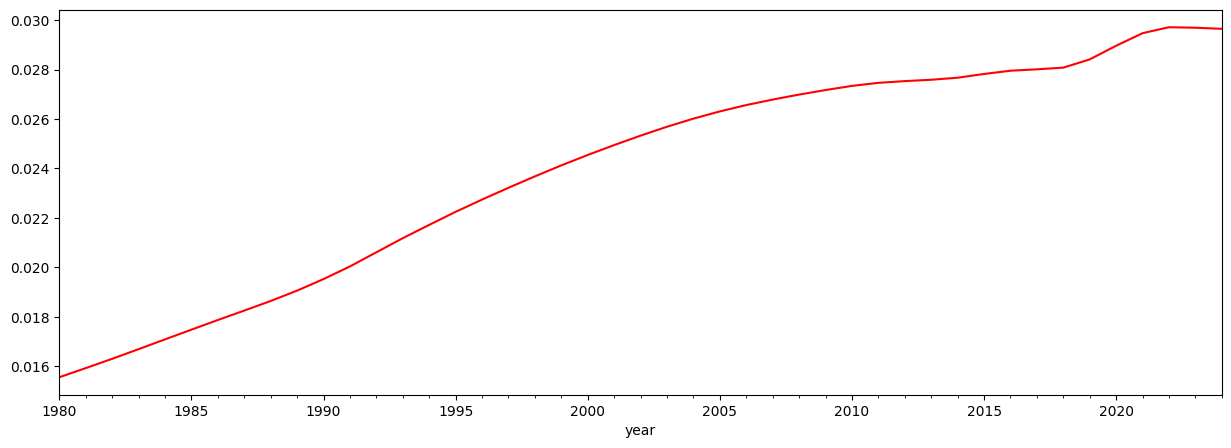

In [104]:
df['Total Population'].plot(figsize=(15,5),color='red')

In [105]:
df['Total Population'].min()*1000000000

15553105.0

In [106]:
df['Total Population'].max()*1000000000

29715436.0

**Key Insight**
The total population graph illustrates the demographic growth trend in Nepal. The continuous upward trend indicates a steady increase in the number of people living in the country over the years.

In [107]:
#checking correlation
df.corr()

,GDP,Life Expectancy,Total Population
GDP,1.000000,0.781406,0.794805
Life Expectancy,0.781406,1.000000,0.997864
Total Population,0.794805,0.997864,1.000000


<Axes: >

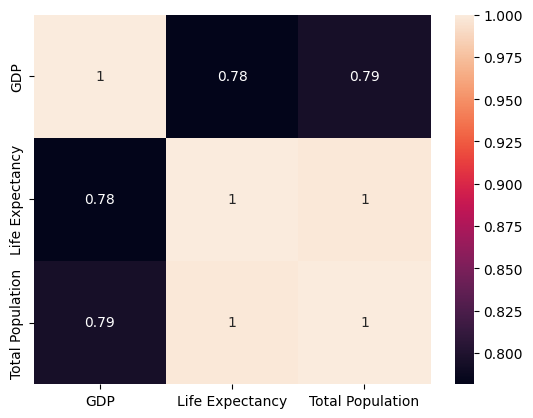

In [108]:
sns.heatmap(df.corr(),annot=True)

__It seems that there is high co-rrelation among each others of all variables__

### 4. Feature Engineering

In [109]:
df.head()

,GDP,Life Expectancy,Total Population
year,,,
1980-01-01,1.945917,48.333,0.015553
1981-01-01,2.275583,48.662,0.015922
1982-01-01,2.395424,49.181,0.016298
1983-01-01,2.447175,49.676,0.016689
1984-01-01,2.581207,50.227,0.017085


In [110]:
# we can here further create a column called GDP_per_capital by GDP and population

#GDP tells you the size of the economy.
# GDP per capita tells you the average wealth per person.


In [111]:
df['GDP_per_capital'] = df['GDP']/df['Total Population']

In [112]:
df.head()

,GDP,Life Expectancy,Total Population,GDP_per_capital
year,,,,
1980-01-01,1.945917,48.333,0.015553,125.114347
1981-01-01,2.275583,48.662,0.015922,142.916899
1982-01-01,2.395424,49.181,0.016298,146.976663
1983-01-01,2.447175,49.676,0.016689,146.632953
1984-01-01,2.581207,50.227,0.017085,151.078187


<Axes: xlabel='year'>

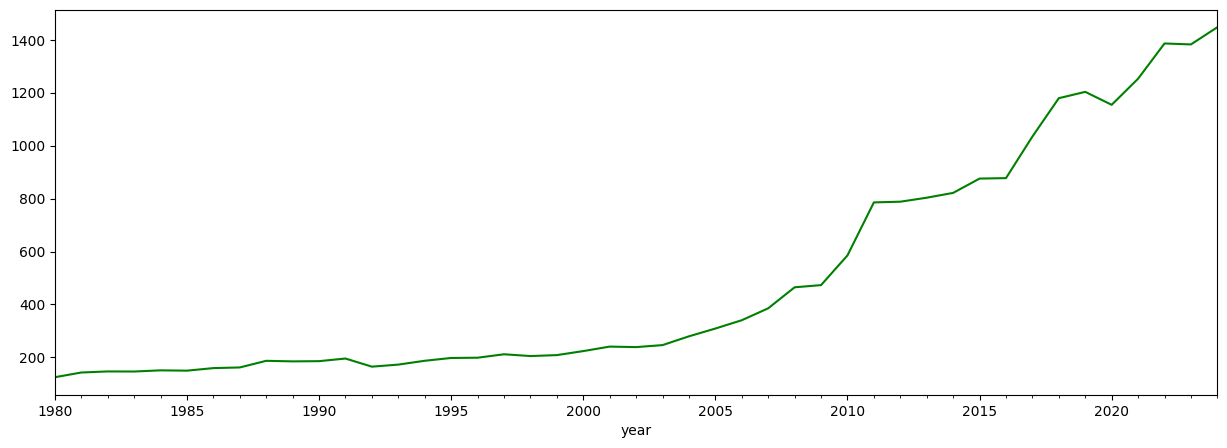

In [113]:
#plotting GDP_per_capital
df['GDP_per_capital'].plot(figsize=(15,5),color='green')

<Axes: xlabel='year'>

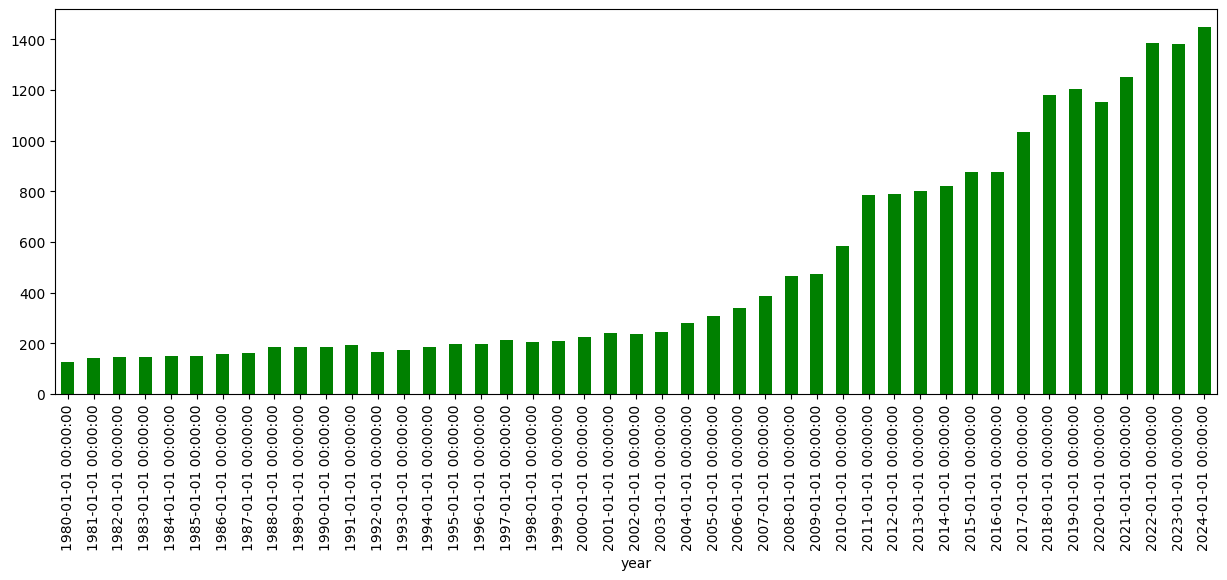

In [114]:
#plotting GDP_per_capital
df['GDP_per_capital'].plot(kind = 'bar',figsize=(15,5),color='green')

**Key Insight**

The steeper increase after 2003, we can also observe the overall upward trend throughout the entire period, indicating a long-term improvement in the average economic well-being of the population.



GDP per capita is calculated by dividing the total GDP by the total population. It's often used as an indicator of a country's average economic prosperity or standard of living. When GDP per capita increases, it generally means that, on average, each person in the country is contributing more to the economy and potentially has access to more resources and opportunities.

In [115]:
df.head()

,GDP,Life Expectancy,Total Population,GDP_per_capital
year,,,,
1980-01-01,1.945917,48.333,0.015553,125.114347
1981-01-01,2.275583,48.662,0.015922,142.916899
1982-01-01,2.395424,49.181,0.016298,146.976663
1983-01-01,2.447175,49.676,0.016689,146.632953
1984-01-01,2.581207,50.227,0.017085,151.078187


## 5. Model Building

In [116]:
df.head()

,GDP,Life Expectancy,Total Population,GDP_per_capital
year,,,,
1980-01-01,1.945917,48.333,0.015553,125.114347
1981-01-01,2.275583,48.662,0.015922,142.916899
1982-01-01,2.395424,49.181,0.016298,146.976663
1983-01-01,2.447175,49.676,0.016689,146.632953
1984-01-01,2.581207,50.227,0.017085,151.078187


In [117]:
##using Prophet
from prophet import Prophet

In [118]:
##prepare data for prophet for gdp
df_gdp = df[['GDP']].reset_index().rename(columns={'year':'ds','GDP':'y'})
df_gdp.head()

,ds,y
0,1980-01-01,1.945917
1,1981-01-01,2.275583
2,1982-01-01,2.395424
3,1983-01-01,2.447175
4,1984-01-01,2.581207


In [119]:
#initialize the model and fit the model
model = Prophet()
model.fit(df_gdp)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/i9b09dlf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/_34qunpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91490', 'data', 'file=/tmp/tmp1vl3rbdx/i9b09dlf.json', 'init=/tmp/tmp1vl3rbdx/_34qunpl.json', 'output', 'file=/tmp/tmp1vl3rbdx/prophet_modelhhvmsmu_/prophet_model-20250924015637.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:56:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:56:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [120]:
#create a future dataframe say predict 10 years a head,yearly
future = model.make_future_dataframe(periods=10,freq='YE')

In [121]:
forecast = model.predict(future)

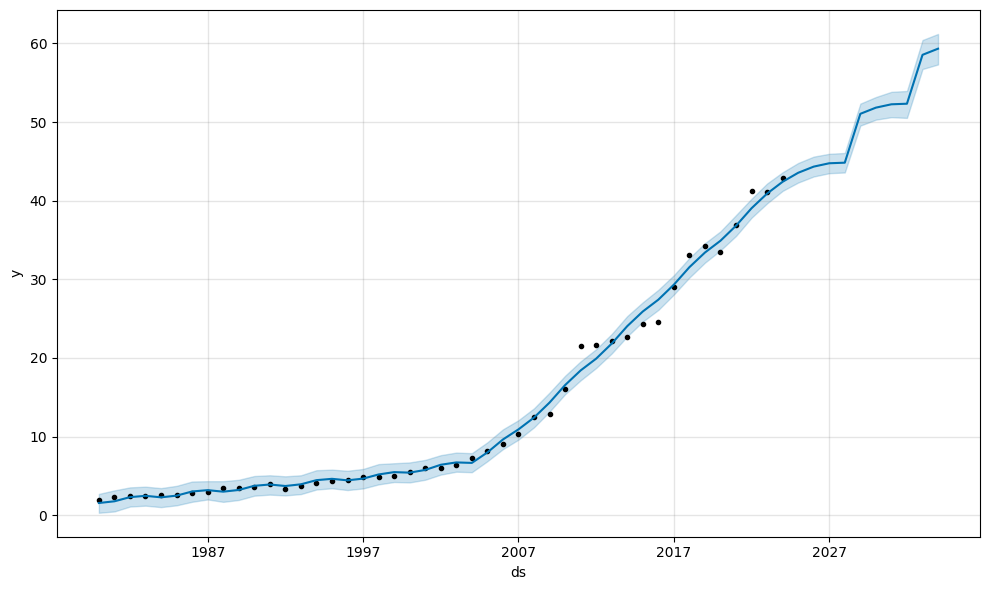

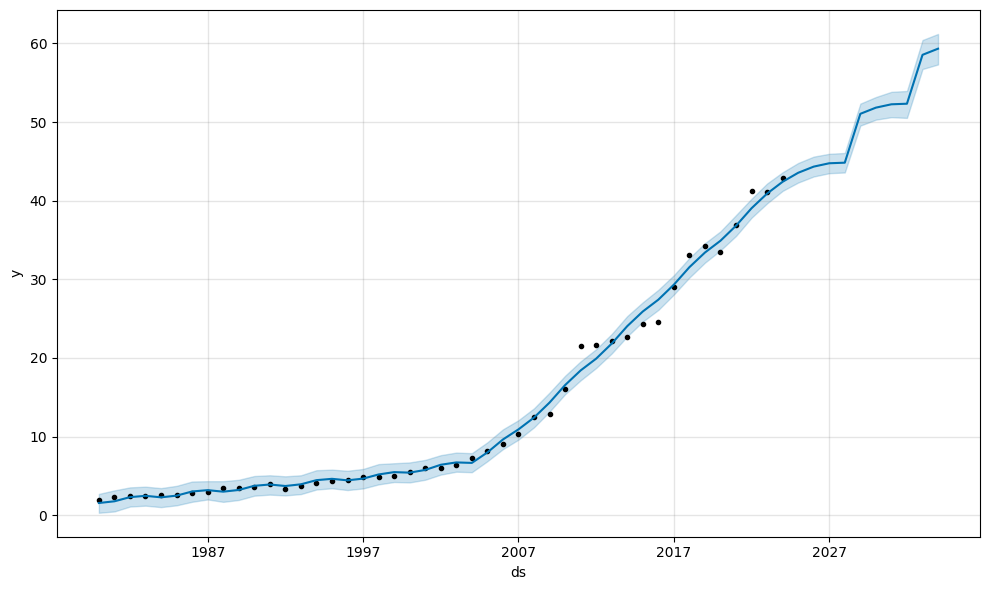

In [122]:
#plot forecast for GPD
model.plot(forecast)


**Key Insight**

The first plot, model.plot(forecast), shows the overall forecast with the historical data.

The black dots represent the actual historical GDP data points. The blue line is the Prophet model's prediction (the yhat). The light blue shaded area represents the uncertainty interval (the yhat_lower and yhat_upper). This gives you a range within which the model expects the true value to lie.

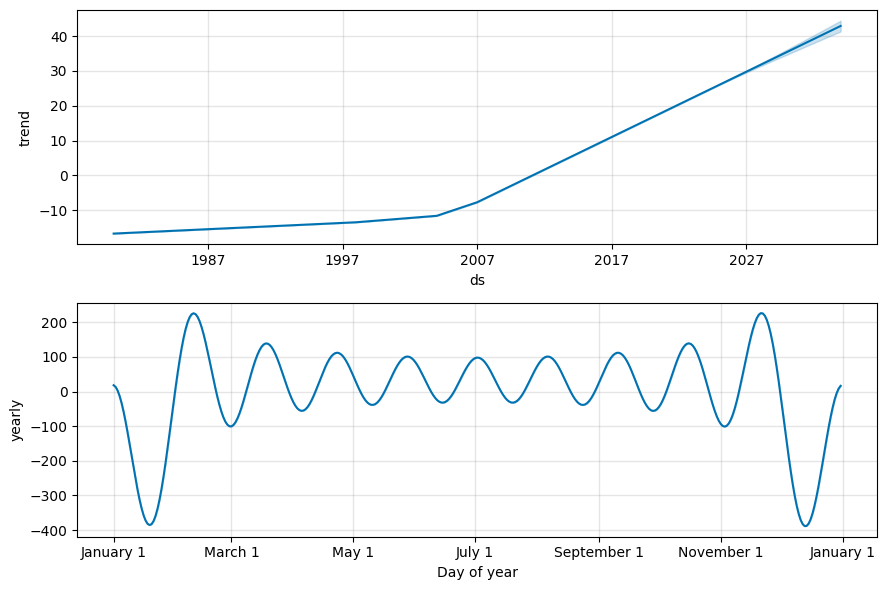

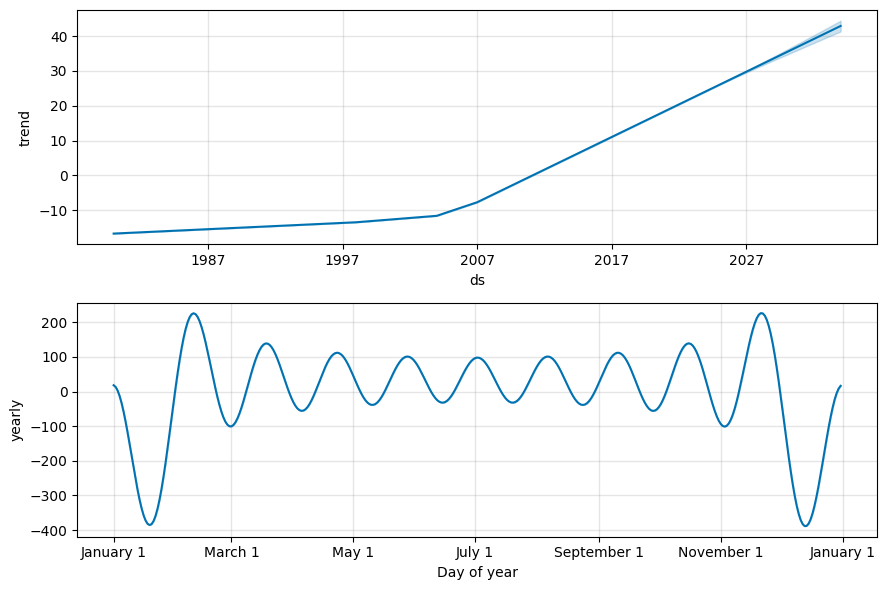

In [123]:
model.plot_components(forecast)

**Key Insight**

The second plot, model.plot_components(forecast), shows the individual components of the forecast. Since you have yearly data, you'll primarily see the trend component.

In [124]:
# Prepare data for Life Expectancy
df_life = df[['Life Expectancy']].reset_index().rename(columns={'year':'ds','Life Expectancy':'y'})

In [125]:
df_life.head()

,ds,y
0,1980-01-01,48.333
1,1981-01-01,48.662
2,1982-01-01,49.181
3,1983-01-01,49.676
4,1984-01-01,50.227


In [126]:
#initialize model1 for life expectancy and fit with model1
model1 = Prophet()
model1.fit(df_life)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/ijw9pq8r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/azaa4jwc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97158', 'data', 'file=/tmp/tmp1vl3rbdx/ijw9pq8r.json', 'init=/tmp/tmp1vl3rbdx/azaa4jwc.json', 'output', 'file=/tmp/tmp1vl3rbdx/prophet_modeltw_7x741/prophet_model-20250924015639.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:56:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:56:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [127]:
#create future1 dataframe
future1 = model1.make_future_dataframe(periods=10,freq='YE')

In [128]:
#forecast1
forecast1 = model1.predict(future1)

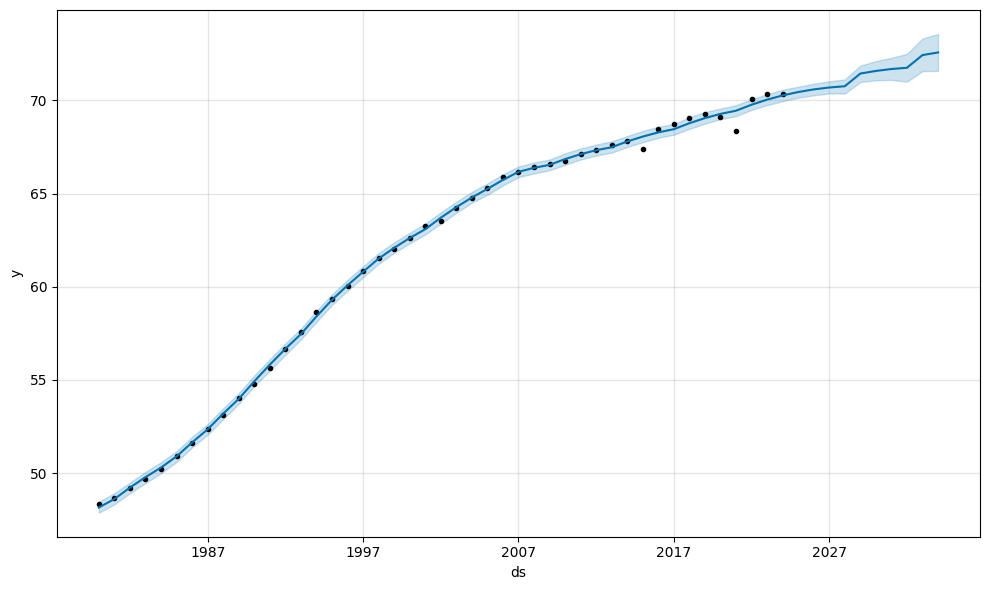

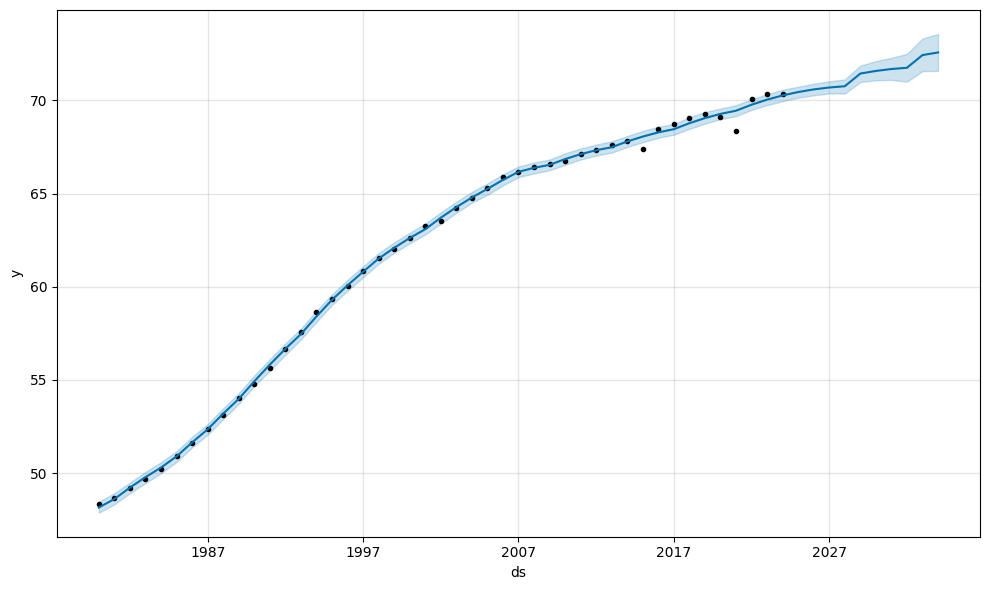

In [129]:
#plot
model1.plot(forecast1)

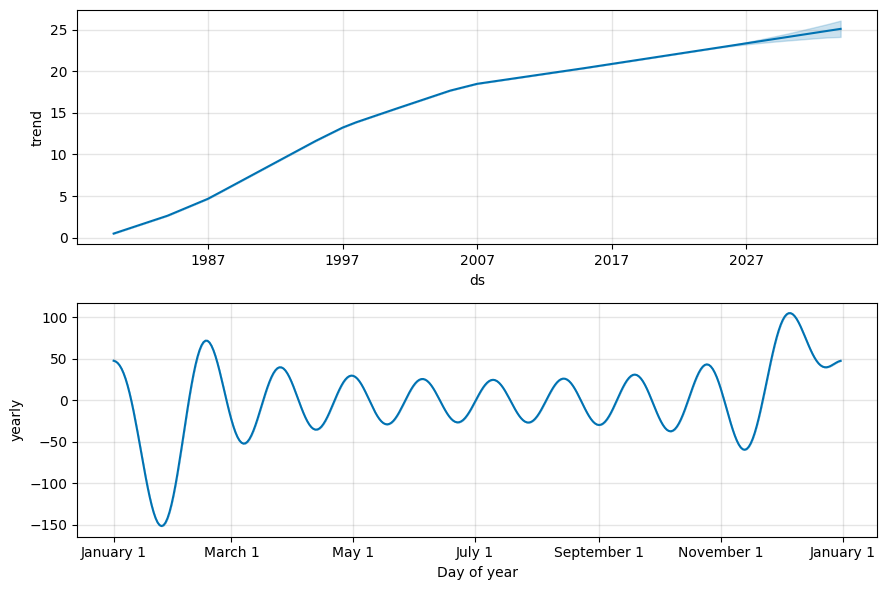

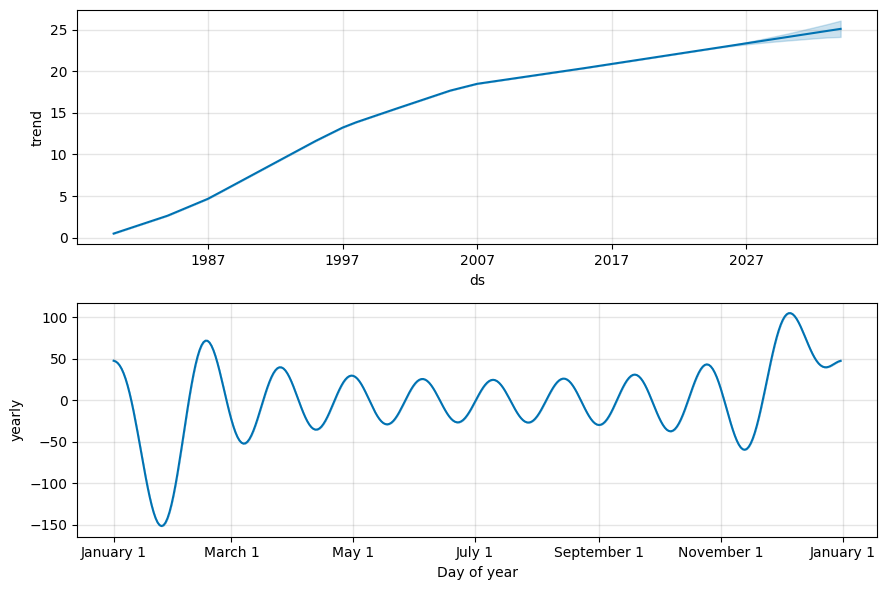

In [130]:
model1.plot_components(forecast1)

In [131]:
## Prepare data for total population
df_pop = df[['Total Population']].reset_index().rename(columns={'year':'ds','Total Population':'y'})

In [132]:
#initialize model2 and fit

model2 = Prophet()
model2.fit(df_pop)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/6cxj2c66.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/9djiihho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80733', 'data', 'file=/tmp/tmp1vl3rbdx/6cxj2c66.json', 'init=/tmp/tmp1vl3rbdx/9djiihho.json', 'output', 'file=/tmp/tmp1vl3rbdx/prophet_modelnqp7tmz4/prophet_model-20250924015641.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:56:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:56:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [133]:
#make future2
future2 = model2.make_future_dataframe(periods=10,freq='YE')

In [134]:
#forescast2
forecast2 = model2.predict(future2)

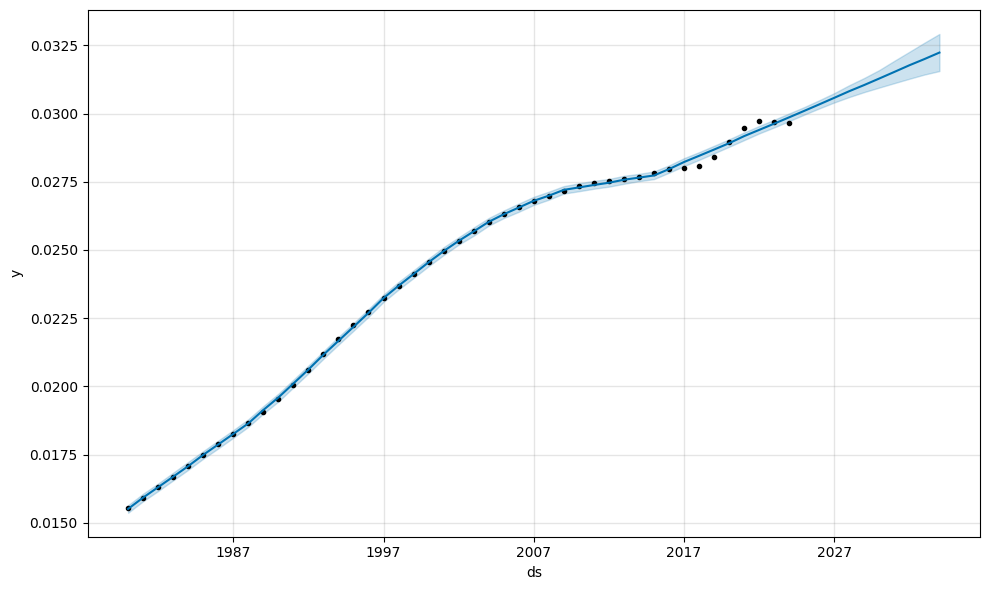

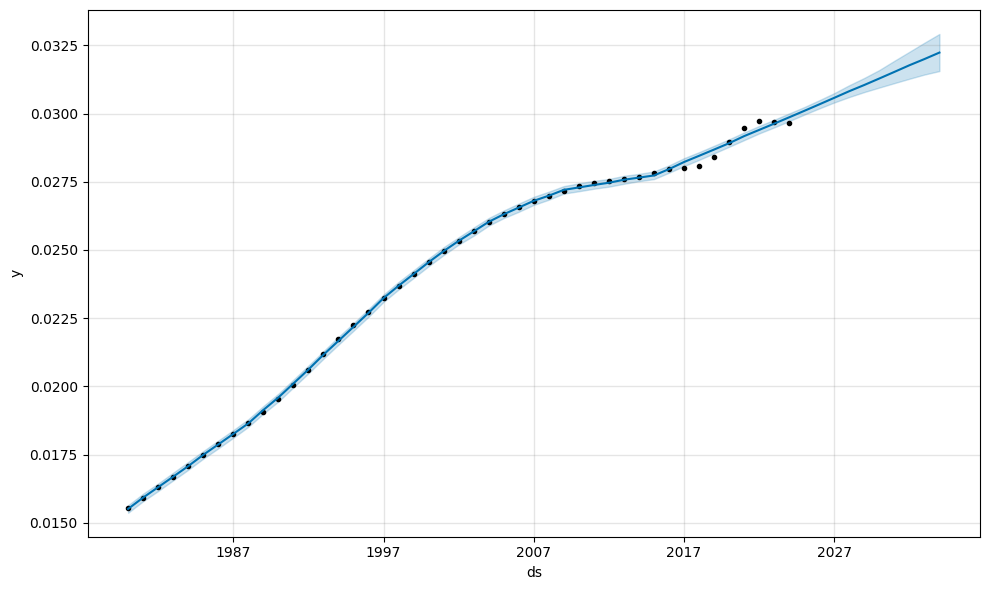

In [135]:
#plot
model2.plot(forecast2)

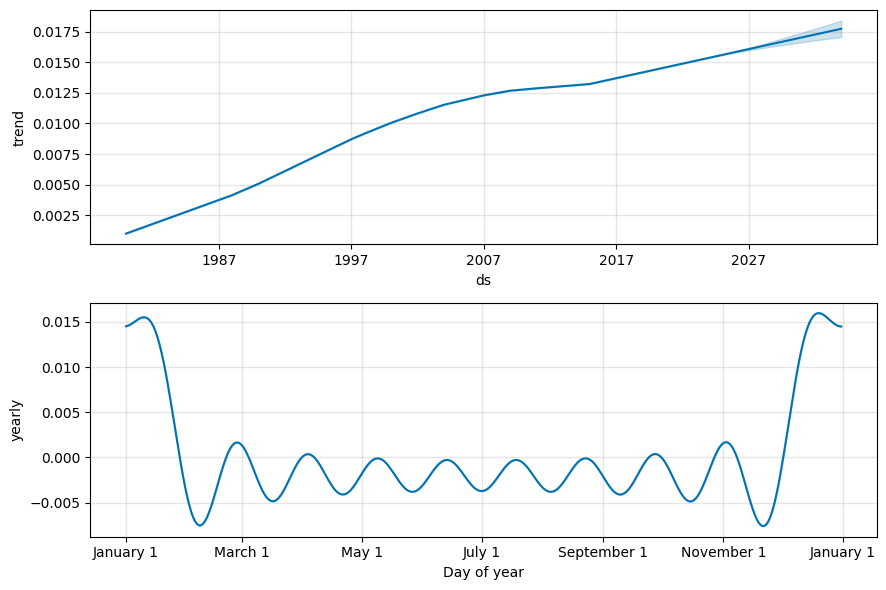

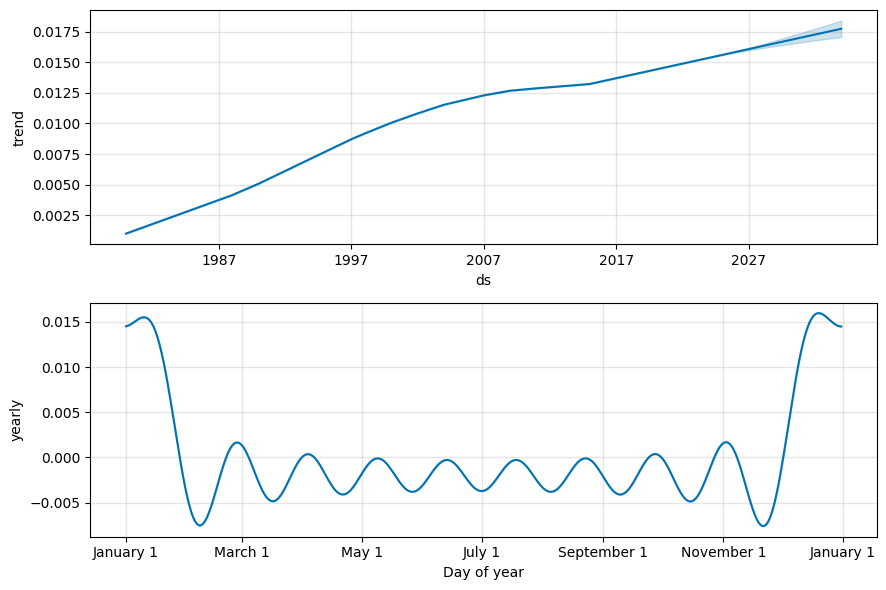

In [136]:
model2.plot_components(forecast2)

In [137]:
#prepare data for GDP_per_capital
df_gdp_cap = df[['GDP_per_capital']].reset_index().rename(columns={'year':'ds','GDP_per_capital':'y'})

In [138]:
#initialized and fit
model3 = Prophet()
model3.fit(df_gdp_cap)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/xyjbilmw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/3au0r0ef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5437', 'data', 'file=/tmp/tmp1vl3rbdx/xyjbilmw.json', 'init=/tmp/tmp1vl3rbdx/3au0r0ef.json', 'output', 'file=/tmp/tmp1vl3rbdx/prophet_modelh_4g12b_/prophet_model-20250924015643.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:56:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:56:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [139]:
#create future
future3 = model3.make_future_dataframe(periods=10,freq='YE')

In [140]:
#predict
forecast3 = model3.predict(future3)

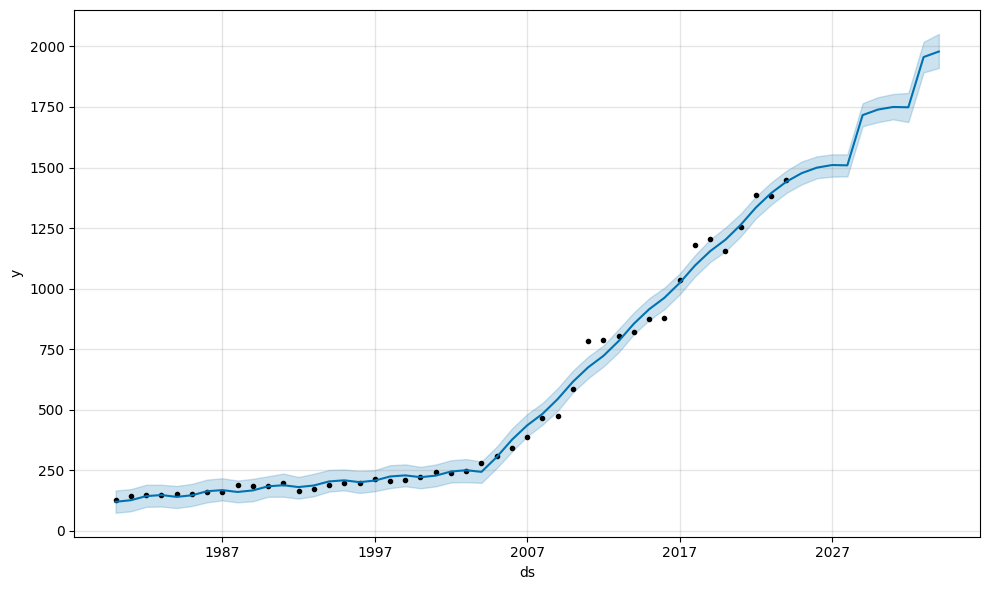

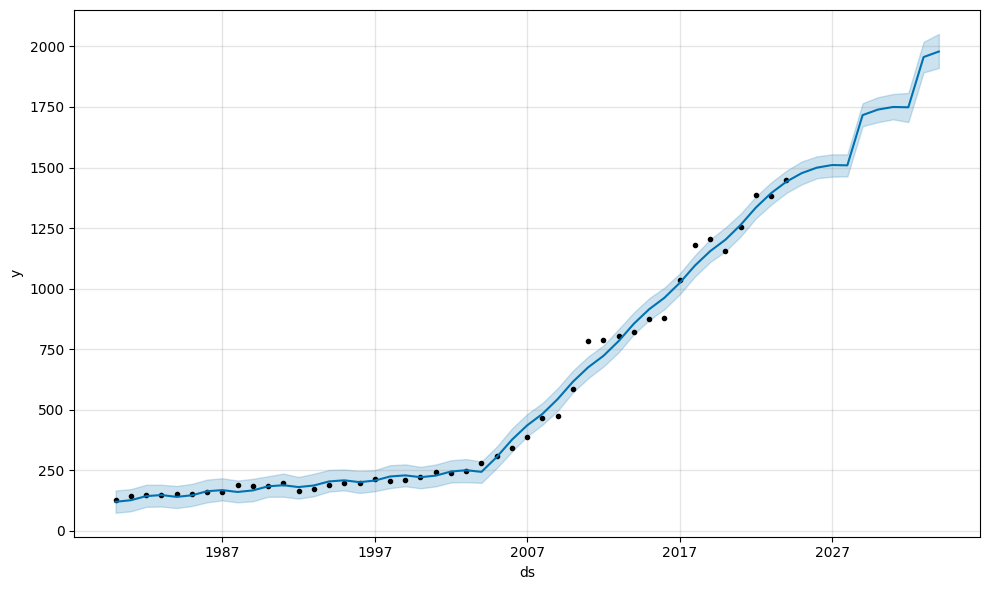

In [141]:
#plot
model3.plot(forecast3)

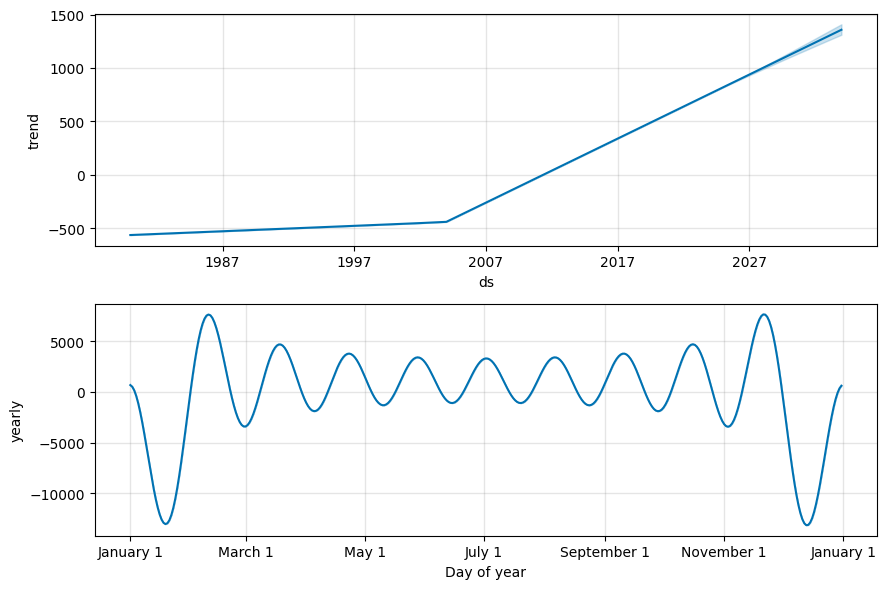

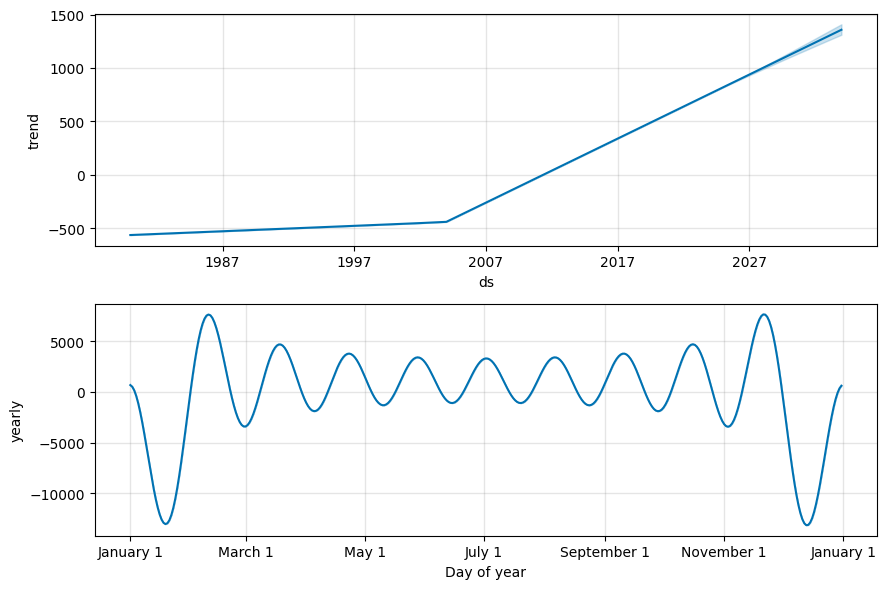

In [142]:
model3.plot_components(forecast3)

In [143]:
#make pipeline model,model1,model2,model3

from sklearn.pipeline import Pipeline



In [144]:
def predict_all_metrics(date):
  """
  Predicts GDP, Life Expectancy, Total Population, and GDP per capita for a given date.

  Args:
    date: A pandas Timestamp or a string that can be converted to a Timestamp.

  Returns:
    A dictionary containing the predicted values for each metric.
  """
  # Create a future dataframe for the given date
  future_date = pd.DataFrame({'ds': [pd.to_datetime(date)]})

  # Predict using each model
  forecast_gdp = model.predict(future_date)
  forecast_life = model1.predict(future_date)
  forecast_pop = model2.predict(future_date)
  forecast_gdp_cap = model3.predict(future_date)

  # Extract the predicted values (yhat)
  predicted_values = {
      'GDP': forecast_gdp['yhat'].iloc[0],
      'Life Expectancy': forecast_life['yhat'].iloc[0],
      'Total Population': forecast_pop['yhat'].iloc[0],
      'GDP_per_capital': forecast_gdp_cap['yhat'].iloc[0]
  }

  return predicted_values

In [147]:
#checking the model predictions
forecast_date = '2025-01-01'
predicted_values = predict_all_metrics(forecast_date)
print(predicted_values)

{'GDP': np.float64(44.326046405892356), 'Life Expectancy': np.float64(70.44099890577644), 'Total Population': np.float64(0.030121271896166694), 'GDP_per_capital': np.float64(1503.0493665240783)}


In [148]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [149]:
##for gpd
## test the model by spliting into train test split

#train upto 2015-01-01
train_gdp = df_gdp[df_gdp['ds'] < '2016-01-01']

test_gdp = df_gdp[df_gdp['ds'] >= '2016-01-01']

model_gdp = Prophet()
model_gdp.fit(train_gdp)

future_gdp = model_gdp.make_future_dataframe(periods=len(test_gdp),freq='YE', include_history = False)

forecast_gdp = model_gdp.predict(future_gdp)

#evaluate on test gpd
mae_gdp = mean_absolute_error(test_gdp['y'],forecast_gdp['yhat'])
rmse_gdp = np.sqrt(mean_squared_error(test_gdp['y'],forecast_gdp['yhat']))

print(f"Test MAE: {mae_gdp:.2f}")
print(f"Test RMSE: {rmse_gdp:.2f}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/wfes1i5x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/h8_3m1sm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32225', 'data', 'file=/tmp/tmp1vl3rbdx/wfes1i5x.json', 'init=/tmp/tmp1vl3rbdx/h8_3m1sm.json', 'output', 'file=/tmp/tmp1vl3rbdx/prophet_model0hyptsbk/prophet_model-20250924015702.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:57:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:57:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test MAE: 14.58
Test RMSE: 15.21


In [150]:

##for life expectancy
## test the model by spliting into train test split

#train upto 2015-01-01
train_life = df_life[df_life['ds'] < '2016-01-01']

test_life = df_life[df_life['ds'] >= '2016-01-01']

model_life = Prophet()
model_life.fit(train_life)

future_life = model_life.make_future_dataframe(periods=len(test_life),freq='YE', include_history = False)

forecast_life = model_life.predict(future_life)

#evaluate on test life expectancy
mae_life = mean_absolute_error(test_life['y'],forecast_life['yhat'])
rmse_life = np.sqrt(mean_squared_error(test_life['y'],forecast_life['yhat']))

print(f"Test MAE: {mae_life:.2f}")
print(f"Test RMSE: {rmse_life:.2f}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/z_872tai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/s4j7df_1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25459', 'data', 'file=/tmp/tmp1vl3rbdx/z_872tai.json', 'init=/tmp/tmp1vl3rbdx/s4j7df_1.json', 'output', 'file=/tmp/tmp1vl3rbdx/prophet_modelisflj0il/prophet_model-20250924020022.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:00:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test MAE: 0.44
Test RMSE: 0.50


In [164]:
# for total population

train_pop = df_pop[df_pop['ds'] < '2016-01-01']
test_pop = df_pop[df_pop['ds'] >= '2016-01-01']

model_pop = Prophet()
model_pop.fit(train_pop)

future_pop = model_pop.make_future_dataframe(periods=len(test_pop),freq='YE', include_history = False)
forescat_pop = model_pop.predict(future_pop)

#evaluate in test_pop


mae_pop = mean_absolute_error(test_pop['y'], forescat_pop['yhat'])
rmse_pop = np.sqrt(mae_pop)


print(f"Test MAE: {mae_gdp:.2f}")
print(f"Test RMSE: {rmse_gdp:.2f}")


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/hc05jpbc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/xpm51em0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49824', 'data', 'file=/tmp/tmp1vl3rbdx/hc05jpbc.json', 'init=/tmp/tmp1vl3rbdx/xpm51em0.json', 'output', 'file=/tmp/tmp1vl3rbdx/prophet_model696r6x0s/prophet_model-20250924020929.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:09:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:09:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test MAE: 14.58
Test RMSE: 15.21


In [169]:
#for gdp per capital

train_gdp_per_cap = df_gdp_cap[df_gdp_cap['ds'] < '2016-01-01']
test_gdp_per_cap = df_gdp_cap[df_gdp_cap['ds'] >= '2016-01-01']

model_gdp_per_cap = Prophet()
model_gdp_per_cap.fit(train_gdp_per_cap)

future_gdp_per_cap = model_gdp_per_cap.make_future_dataframe(periods = len(test_gdp_per_cap),freq= 'YE',include_history=False)
forecast_gdp_per_cap = model_gdp_per_cap.predict(future_gdp_per_cap)

#evaluate models

mse_gdp_per_cap = mean_squared_error(test_gdp_per_cap['y'],forecast_gdp_per_cap['yhat'])
rsme_gdp_per_cap = np.sqrt(mse_gdp_per_cap)

print(f"Test MAE: {mae_gdp:.2f}")
print(f"Test RMSE: {rmse_gdp:.2f}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/g1lsk67b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vl3rbdx/m3xiwjcq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63375', 'data', 'file=/tmp/tmp1vl3rbdx/g1lsk67b.json', 'init=/tmp/tmp1vl3rbdx/m3xiwjcq.json', 'output', 'file=/tmp/tmp1vl3rbdx/prophet_modelwarkbzpm/prophet_model-20250924021725.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:17:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:17:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test MAE: 14.58
Test RMSE: 15.21


### Since the model of life expectancy is below 1 which is very good as the model is accurately predicting the life expectancy.

### Whereas, we can also summarize for all other models that the MAE and RMSE is below 16, so which is also a lower value considering the fact that models are performing well

In [ ]:
df.head()

,GDP,Life Expectancy,Total Population,GDP_per_capital
year,,,,
1980-01-01,1.945917,48.333,0.015553,125.114347
1981-01-01,2.275583,48.662,0.015922,142.916899
1982-01-01,2.395424,49.181,0.016298,146.976663
1983-01-01,2.447175,49.676,0.016689,146.632953
1984-01-01,2.581207,50.227,0.017085,151.078187


In [ ]:
test_gdp.shape

(9, 2)

In [ ]:
print(test_gdp)

           ds          y
36 2016-01-01  24.524109
37 2017-01-01  28.971589
38 2018-01-01  33.111525
39 2019-01-01  34.186181
40 2020-01-01  33.433659
41 2021-01-01  36.924841
42 2022-01-01  41.182940
43 2023-01-01  41.047772
44 2024-01-01  42.914268


In [ ]:
import pickle
df.head()

,GDP,Life Expectancy,Total Population,GDP_per_capital
year,,,,
1980-01-01,1.945917,48.333,0.015553,125.114347
1981-01-01,2.275583,48.662,0.015922,142.916899
1982-01-01,2.395424,49.181,0.016298,146.976663
1983-01-01,2.447175,49.676,0.016689,146.632953
1984-01-01,2.581207,50.227,0.017085,151.078187


In [ ]:
#for gdp model
with open('model_gdp.pkl','wb') as f:
  pickle.dump(model,f)

#for life expectancy model
with open('model_life.pkl','wb') as f:
  pickle.dump(model1,f)

#for total population model
with open('model_pop.pkl','wb') as f:
  pickle.dump(model2,f)

#for GDP_per capital

with open('model_gdp_cap.pkl','wb') as f:
  pickle.dump(model3,f)
